# EECS16A Homework 6B

## Problem 3: Image Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def plot_circle(a, d, e, color='r'):
    """
    You can use this function to plot circles with parameters a,d,e.
    The parameters are described in the homework pdf. 
    
    """
    is_circle = d**2 + e**2 + 4*a > 0
    assert is_circle, "Not a circle"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 2
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*(x**2 + y**2) + d*x + e*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors=color)
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    return c1

In [3]:
def plot_ellipse(a, b, c, d, e, color='b'):
    """
    You can use this function to plot ellipses with parameters a-e.
    The parameters are described in the homework pdf. 
    """
    is_ellipse = b**2 - 4*a*c < 0
    assert is_ellipse, "Not an ellipse"
    
    XLIM_LO = -1
    XLIM_HI = 3
    YLIM_LO = -2
    YLIM_HI = 3
    X_COUNT = 400
    Y_COUNT = 400
    
    x = np.linspace(XLIM_LO, XLIM_HI, X_COUNT)
    y = np.linspace(YLIM_LO, YLIM_HI, Y_COUNT)
    x, y = np.meshgrid(x, y)
    f = lambda x,y: a*x**2 + b*x*y + c*y**2 + d*x + e*y
    
    c1 = plt.contour(x, y, f(x,y), [1], colors=color)
    plt.axis('scaled')
    plt.xlabel('x')
    plt.ylabel('y')
    return c1

<IPython.core.display.Javascript object>


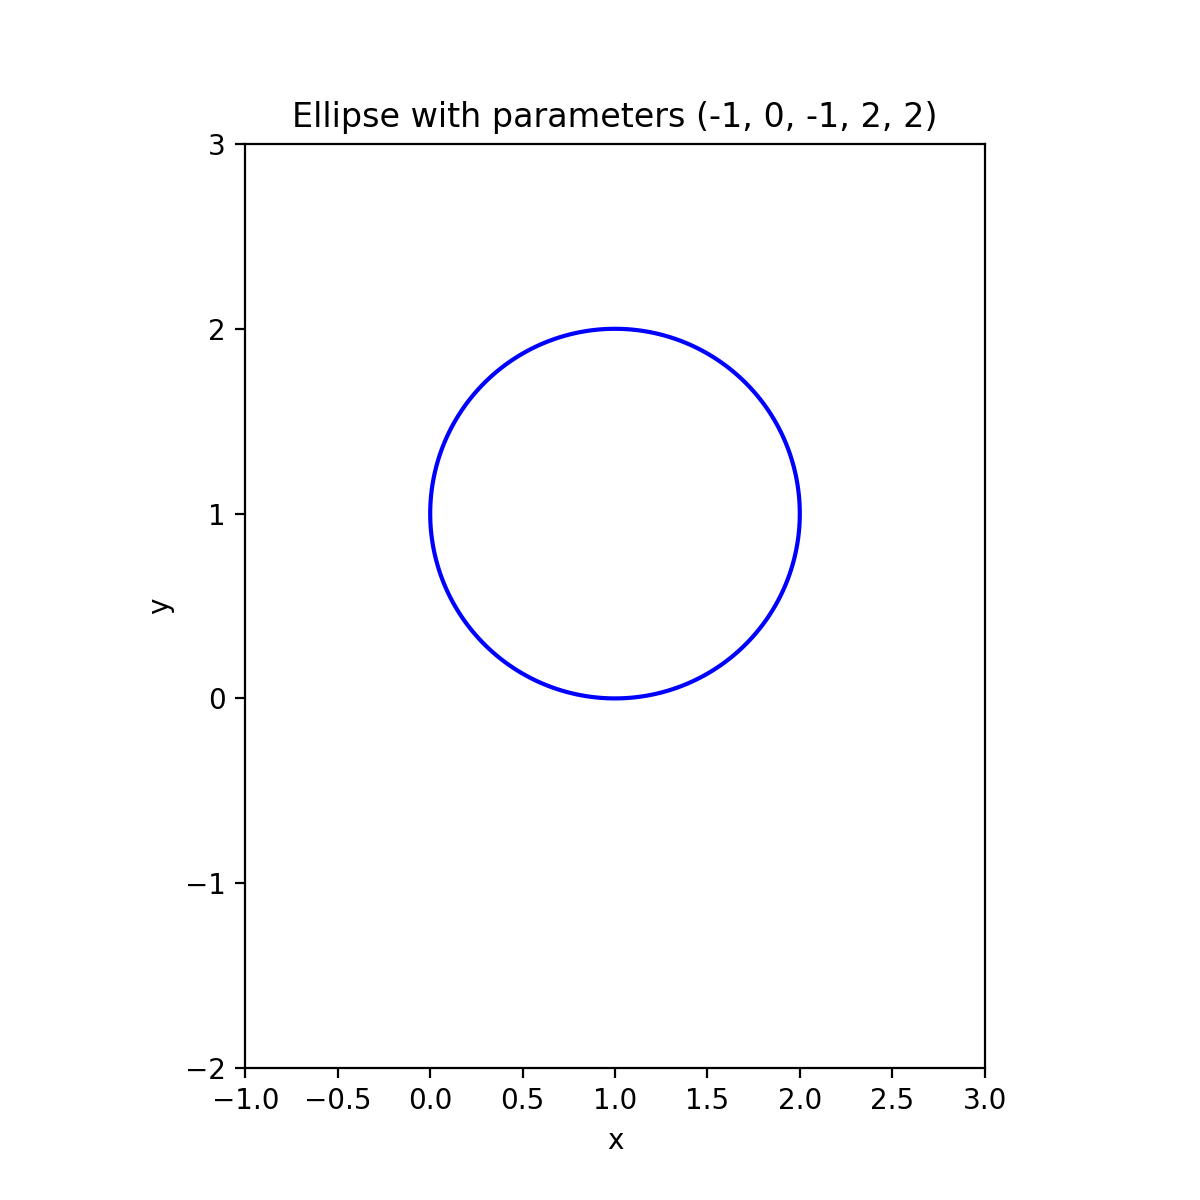

Text(0.5, 1.0, 'Ellipse with parameters (-1, 0, -1, 2, 2)')

In [20]:
# Here is an example of plot_ellipse.
# This plots (x-1)**2 + (y-1)**2 = 1, 
# which is a circle with radius =1 centered at (1,1). 

plt.figure(figsize=(6,6))
plot_ellipse(-1, 0, -1, 2, 2)
plt.title('Ellipse with parameters (-1, 0, -1, 2, 2)')


You may find plt.scatter useful for plotting the points.

### Part (c)

<IPython.core.display.Javascript object>


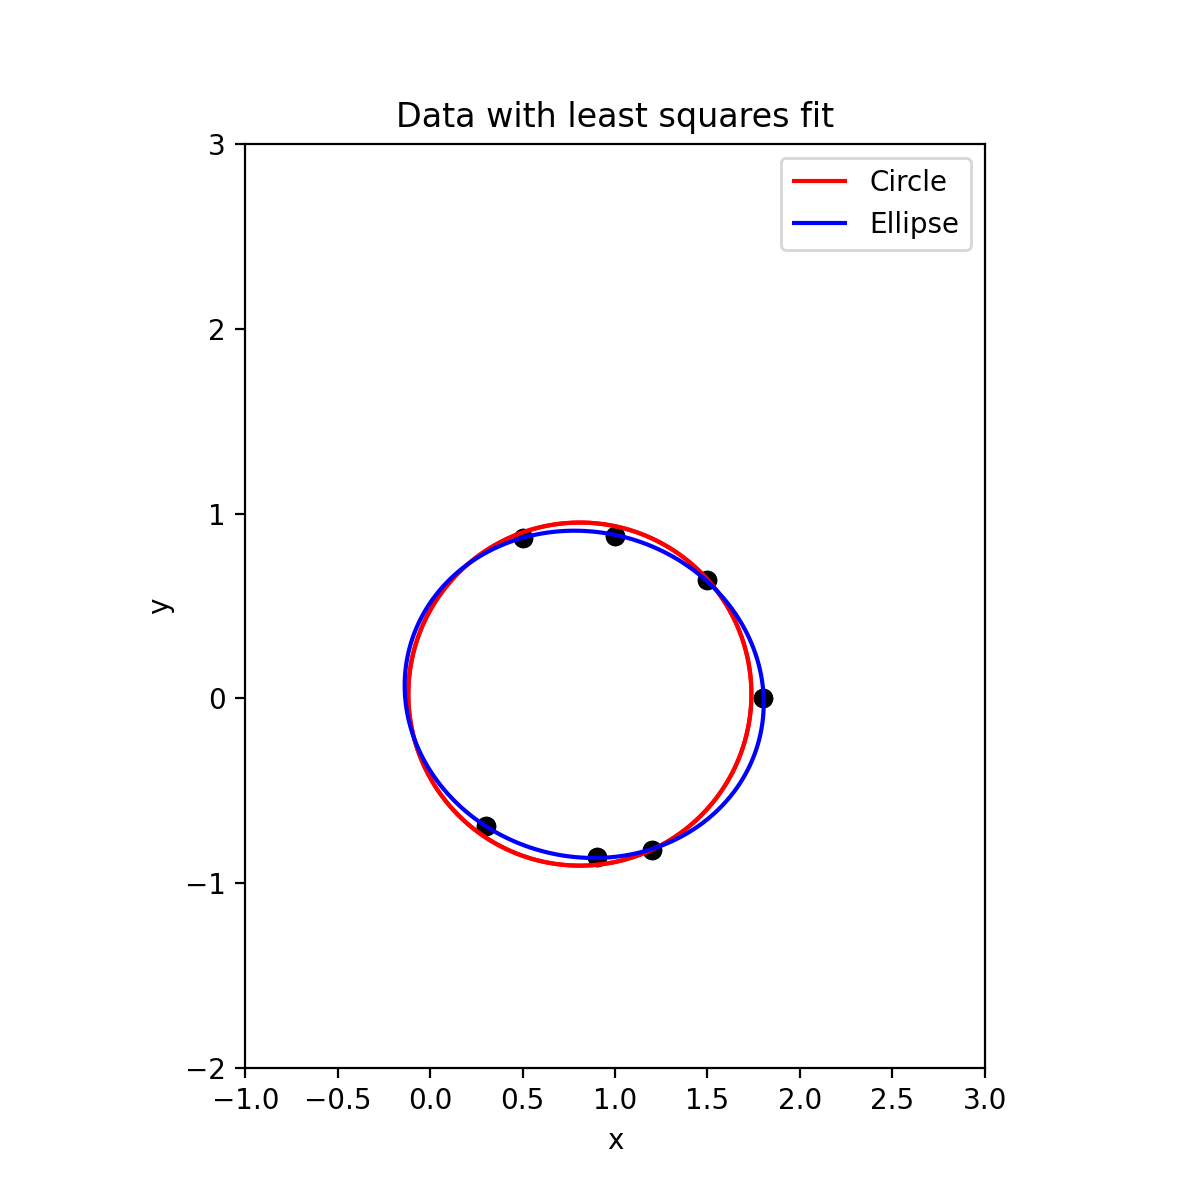

[ 4.87314137 -7.89293482 -0.22651484]
e = [-0.45289988 -0.23676927 -0.35741872 -0.44536583  0.00824421 -0.02376494
  0.58169536]

||e|| = 0.9624339357020364

||e|| / N = 0.13749056224314807



In [21]:
xy = np.array([[0.3, -0.69],
               [0.5, 0.87],
               [0.9, -0.86],
               [1, 0.88],
               [1.2, -0.82],
               [1.5, .64],
               [1.8, 0]])
x = xy[:,0]
y = xy[:,1]

# New figure
plt.figure(figsize=(6,6))

# plot the data points
plt.scatter(x,y)

# First we compute our estimated coefficients
A = np.vstack([x*x+y*y, x, y]).T# YOUR CODE HERE
b = np.ones_like(x)
circle_params = np.linalg.inv(A.T @ A) @ A.T @ b# YOUR CODE HERE
print(circle_params)

# Then we plot
circ = plot_circle(circle_params[0], circle_params[1], circle_params[2])
plt.scatter(x,y, color='k')
plt.title('Data with least squares fit')

# Compute error
e = A @ circle_params - b # YOUR CODE HERE
print("e = {}\n".format(e))

e_magnitude = np.linalg.norm(e) # YOUR CODE HERE

print("||e|| = {}\n".format(e_magnitude))
N = 7
print("||e|| / N = {}\n".format(e_magnitude / N))

### Part (d)

In [22]:
# Part D

A = np.vstack([x*x, x*y, y*y, x, y]).T # YOUR CODE HERE
b = np.ones_like(x) # YOUR CODE HERE

ellipse_params = np.linalg.inv(A.T @ A) @ A.T @ b # YOUR CODE HERE
print(ellipse_params)

## Plotting the fitted circle and the fitted ellipse together
circ = plot_circle(circle_params[0], circle_params[1], circle_params[2])
plt.scatter(x,y, color='k')
ellipse = plot_ellipse(ellipse_params[0],ellipse_params[1],ellipse_params[2],ellipse_params[3],ellipse_params[4])
circ_leg,_ = circ.legend_elements()
elip_leg,_ = ellipse.legend_elements()
plt.legend([circ_leg[0], elip_leg[0]], ['Circle', 'Ellipse'])

# Compute error
e = A @ ellipse_params - b # YOUR CODE HERE
print("e = {}\n".format(e))

e_magnitude = np.linalg.norm(e) # YOUR CODE HERE

print("||e|| = {}\n".format(e_magnitude))
N = 7
print("||e|| / N = {}\n".format(e_magnitude / N))

[ 4.10382951  0.48711384  4.93938449 -6.85032284 -0.62259259]
e = [-0.00535492  0.00965504 -0.02961637 -0.04065528  0.04157513  0.05047406
 -0.03417349]

||e|| = 0.08997680361065329

||e|| / N = 0.012853829087236184



## Problem 4: GPS Receivers

In [23]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [24]:
## RUN THIS FUNCTION BEFORE YOU START THIS PROBLEM
## This function will generate the gold code associated with the satellite ID using linear shift registers
## The satellite_ID can be any integer between 1 and 24
def Gold_code_satellite(satellite_ID):
    codelength = 1023
    registerlength = 10
    
    # Defining the MLS for G1 generator
    register1 = -1*np.ones(registerlength)
    MLS1 = np.zeros(codelength)
    for i in range(codelength):
        MLS1[i] = register1[9]
        modulo = register1[2]*register1[9]
        register1 = np.roll(register1,1)
        register1[0] = modulo
    
    # Defining the MLS for G2 generator
    register2 = -1*np.ones(registerlength)
    MLS2 = np.zeros(codelength)
    for j in range(codelength):
        MLS2[j] = register2[9]
        modulo = register2[1]*register2[2]*register2[5]*register2[7]*register2[8]*register2[9]
        register2 = np.roll(register2,1)
        register2[0] = modulo
    
    delay = np.array([5,6,7,8,17,18,139,140,141,251,252,254,255,256,257,258,469,470,471,472,473,474,509,512,513,514,515,516,859,860,861,862])
    G1_out = MLS1;
    shamt = delay[satellite_ID - 1]
    G2_out = np.roll(MLS2,shamt)
    
    CA_code = G1_out * G2_out
    
    return CA_code

### Part (a)

In [25]:
def cross_correlation(array1, array2):
    """ This function should return two arrays or a matrix with one row corresponding to 
    the offset and other to the correlation value. array1 and array2 do not have to be
    arrays of equal length.
    Think of array1 as the received signal and array2 as the signature.
    The function should return correlation values as well as the indices of the nonzero values of the correlation
    Hint: look up np.correlate
    """

    #correlated_array = #Your code here (it is just one line) np.correlate(array1, array2, 'full')
    correlated_array = np.correlate(array1, array2, 'full')
    
    #Since both the arrays start at 0, the last "shift" where the signals overlap is the length of the first array
    end_index = len(array1)
    
    #Similarly, the first "shift" where the signals overlap is the negative of the length of the second array, offset by one because of the zero index.
    st_index = -len(array2) + 1
    
    indices = np.arange(st_index, end_index)    
    return (indices, correlated_array)

Text(0, 0.5, 'Correlation value')

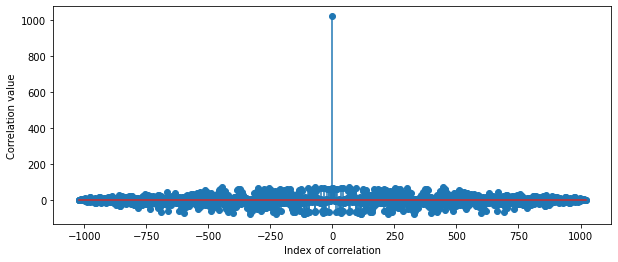

In [26]:
# Plot the auto-correlation of satellite 10 with itself. Fill in the function call.
array_10 = Gold_code_satellite(10)

(ind_10, self_10) = cross_correlation(array_10, array_10) # your code here

plt.figure(figsize=(10, 4))
plt.stem(ind_10, self_10)
plt.xlabel("Index of correlation")
plt.ylabel("Correlation value")

### Part (b) 
Plot the cross correlation when array1 = satellite 13 and array2 = satellite10

Text(0, 0.5, 'Correlation value')

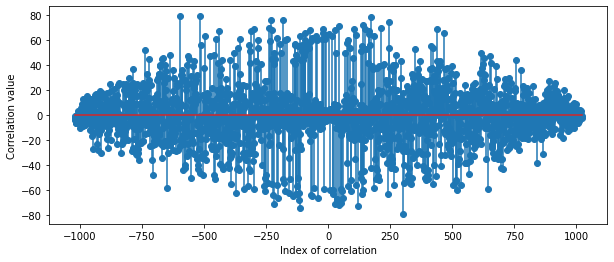

In [27]:
#Your code here
array_13 = Gold_code_satellite(13)
array_10 = Gold_code_satellite(10)

(ind_10, self_10) = cross_correlation(array_13, array_10) # your code here

plt.figure(figsize=(10, 4))
plt.stem(ind_10, self_10)
plt.xlabel("Index of correlation")
plt.ylabel("Correlation value")

### Part (c)

Text(0, 0.5, 'Correlation value')

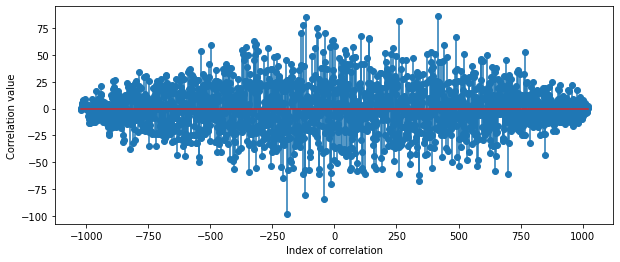

In [28]:
## THIS IS A HELPER FUNCTION FOR PART C THAT GENERATES +-1 RANDOM NOISE
def integernoise_generator(length_of_noise):
    noise_array = np.random.randint(2, size=length_of_noise)
    noise_array = 2 * noise_array - np.ones(len(noise_array))
    return noise_array

# YOUR CODE HERE
array_random = integernoise_generator(1023)
array_10 = Gold_code_satellite(10)

(ind_10, self_10) = cross_correlation(array_random, array_10) # your code here

plt.figure(figsize=(10, 4))
plt.stem(ind_10, self_10)
plt.xlabel("Index of correlation")
plt.ylabel("Correlation value")

### Part (d)

Text(0, 0.5, 'Correlation value')

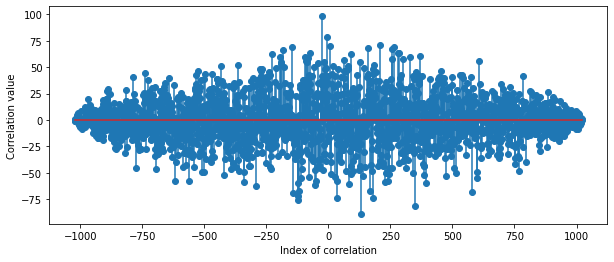

In [29]:
## THIS IS A HELPER FUNCTION FOR PART D THAT GENERATES REAL VALUED RANDOM NOISE
def gaussiannoise_generator(length_of_noise):
    noise_array = np.random.normal(0, 1, length_of_noise)
    return noise_array

# YOUR CODE HERE
array_random = gaussiannoise_generator(1023)
array_10 = Gold_code_satellite(10)

(ind_10, self_10) = cross_correlation(array_random, array_10) # your code here

plt.figure(figsize=(10, 4))
plt.stem(ind_10, self_10)
plt.xlabel("Index of correlation")
plt.ylabel("Correlation value")

### Part (e)
Hint: you can use a absolute value threshold of 800 for the cross-correlation to detect if a given satellite is present. np.argwhere may be useful for detecting peak locations.

In [30]:
#Now let us see which signals are present in the data signal that is in data1.npy
signal1 = np.load('data1.npy')

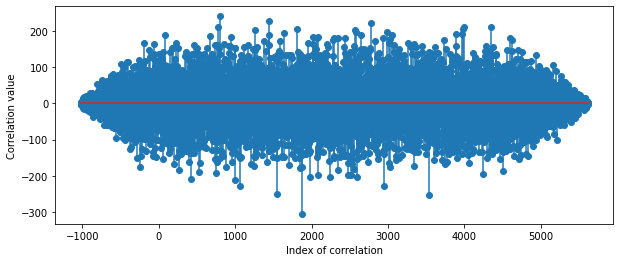

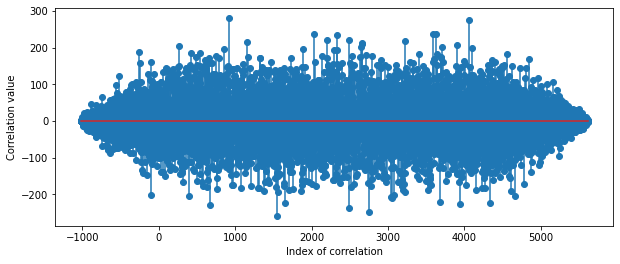

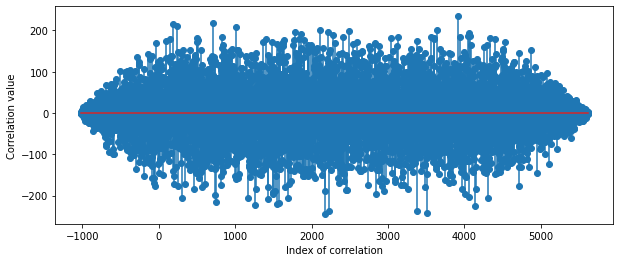

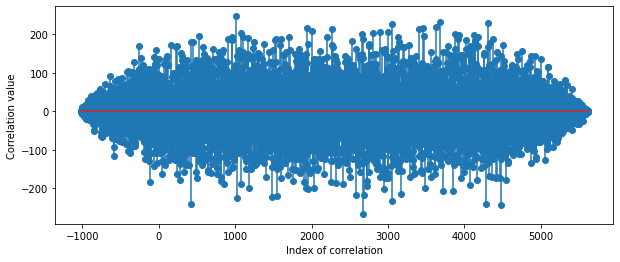

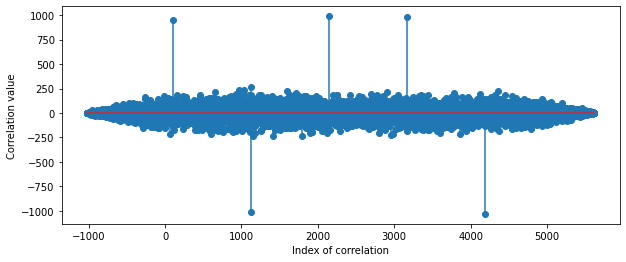

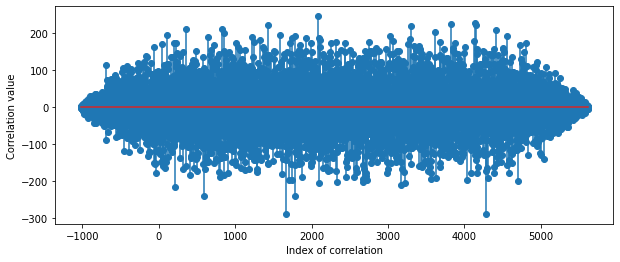

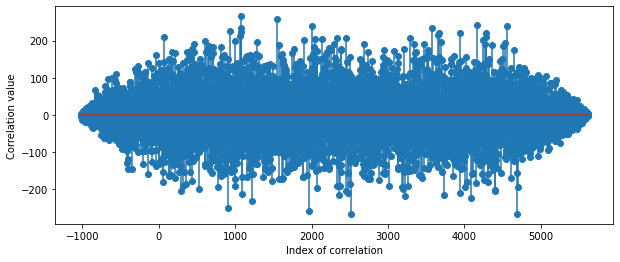

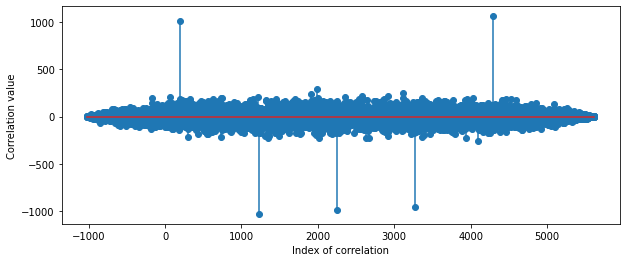

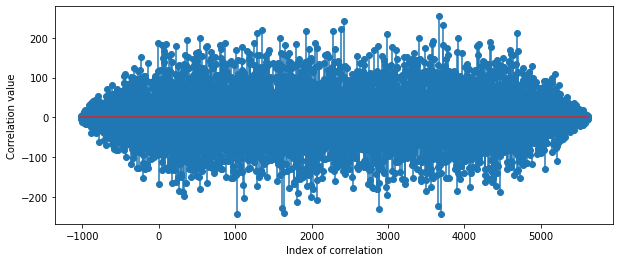

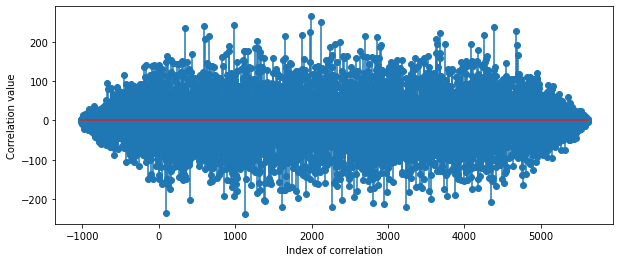

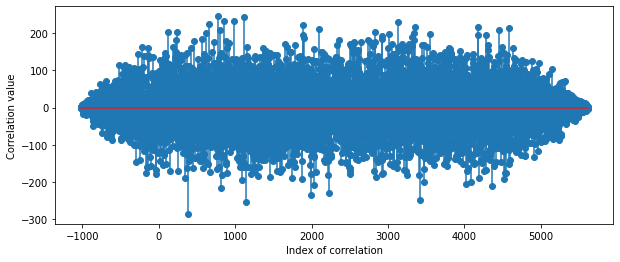

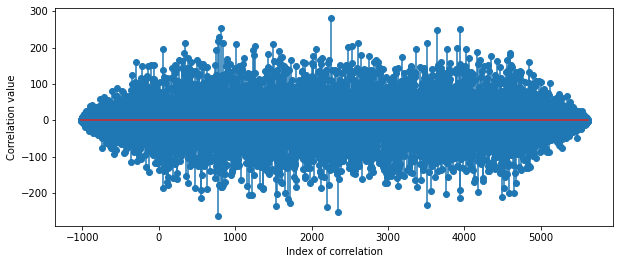

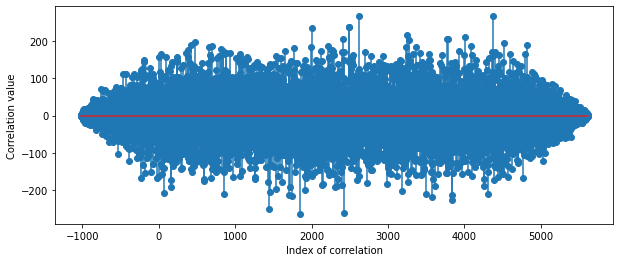

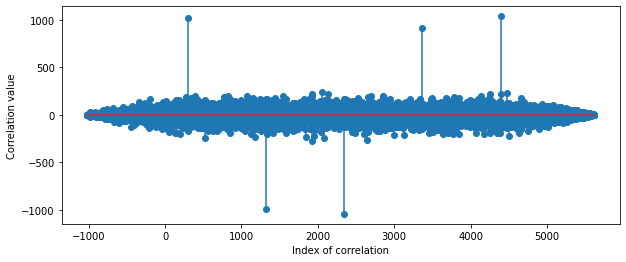

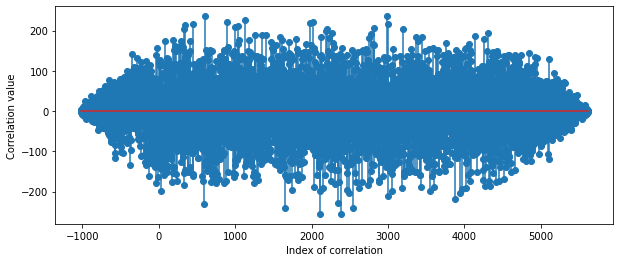

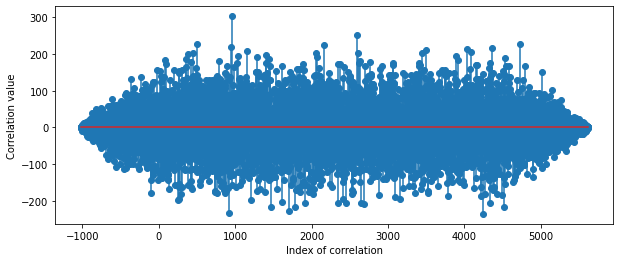

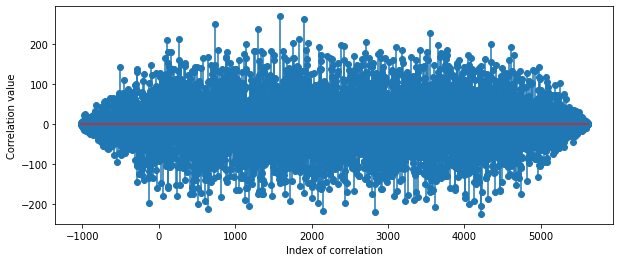

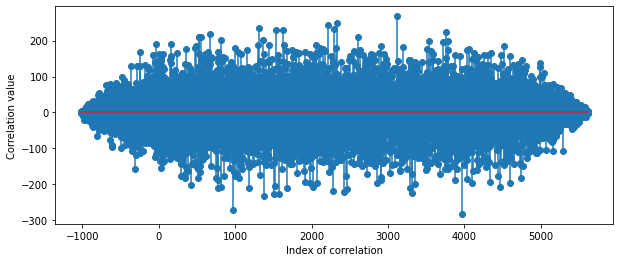

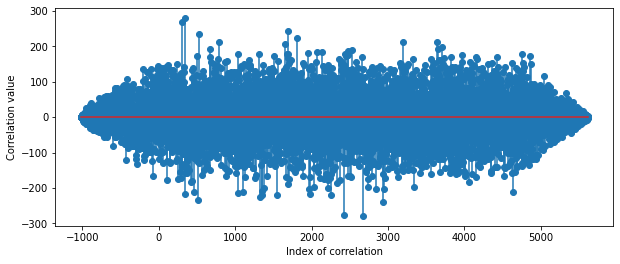

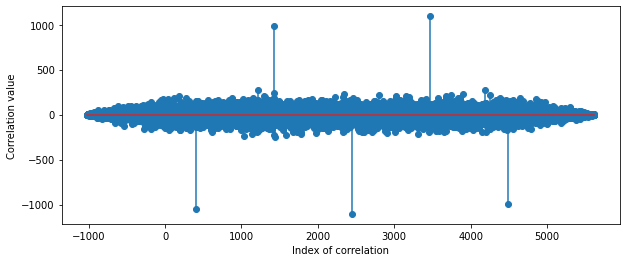

In [36]:
#Here try plotting the cross-correlations of data1.npy with a few of the satellite gold codes. 
#How can you detect if the satellite is present?
arrays = [Gold_code_satellite(i) for i in range(24)]
present = []
for i, arr in enumerate(arrays[:20]):
    idx, corr = cross_correlation(signal1, arr)
    plt.figure(figsize=(10, 4))
    plt.stem(idx, corr)
    plt.xlabel("Index of correlation")
    plt.ylabel("Correlation value")

In [35]:
## This helper function returns 1 if peak (greater than threshold or less than -threshold) is found, else it returns 0.
## You do not have to use this function as there are other solutions to this part as well

def find_peak(signal, threshold):
    max_value = np.amax(signal)
    min_value = np.amin(signal)
    if max_value > threshold:
        ret_value = 1
    elif min_value < -1 * threshold:
        ret_value = 1
    else:
        ret_value = 0
    return ret_value

In [51]:
## USE 'np.load' FUNCTION TO LOAD THE DATA
## USE DATA1.NPY AS THE SIGNAL ARRAY
# YOUR CODE HERE
present = []
for i, arr in enumerate(arrays):
    idx, corr = cross_correlation(signal1, arr)
    if find_peak(corr, 500):
        present.append(i+1)
print(f'Satellite {present} are present')

Satellite [5, 8, 14, 20] are present


### Part (f)

In [48]:
## USE DATA2.NPY AS THE SIGNAL ARRAY

# YOUR CODE HERE --- first write code to figure out which satellite is present
signal2 = np.load('data2.npy')
present = []
for i, arr in enumerate(arrays):
    idx, corr = cross_correlation(signal2, arr)
    if find_peak(corr, 500):
        present.append(i+1)
print(f'Satellite {present} are present')

Satellite [4] are present


In [54]:
## Once you have figured out which satellite is present, proceed to find the data transmitted
idx, corr = cross_correlation(signal2, arrays[3])
def decode_msg(idx, corr):
    msg = []
    shift = []
    for i, sig in enumerate(corr):
        if sig > 500:
            msg.append(1)
            shift.append(idx[i])
        elif sig < -500:
            msg.append(-1)
            shift.append(idx[i])
    return msg, shift

decode_msg(idx, corr)

([1, -1, -1, -1, 1], [253, 1276, 2299, 3322, 4345])

### Part (g)

In [45]:
## USE DATA3.NPY AS THE SIGNAL ARRAY

# YOUR CODE HERE
signal3 = np.load('data3.npy')

In [63]:
## We know that the data is 1, 1, -1, -1, -1, so we just find the positions of the first 1 in both the satellite correlations.
## plot the appropriate cross_correlation and find the location of the first 1
## Do this for as many satellites as there are present
## Your code here
for i, arr in enumerate(arrays):
    idx, corr = cross_correlation(signal3, arr)
#     plt.figure(figsize=(10, 4))
#     plt.stem(idx, corr)
    if find_peak(corr, 500):
        msg, shift = decode_msg(idx, corr)
        for j, m in enumerate(msg):
            if m == 1 and msg[(j+1)%len(msg)] == 1:
                print(f'The delay of satellite {i+1} is {shift[j]}')
        

The delay of satellite 6 is 253
The delay of satellite 21 is 506


## Problem 5: Targeted Promotion

In [68]:
def eeheeh_promotions(M_food, M_movies, M_art, M_books, sA1, sA2, sA3, sA4):
    b = np.array([M_food, M_movies, M_art, M_books])
    b = b / np.sum(b)
    A = np.array([[0.4, 0.7, 0.2, 0.05],
                  [0.33, 0.1, 0.1, 0.02],
                  [0.22, 0.1, 0.15, 0.2],
                  [0.05, 0.1, 0.55, 0.73]])
    xc = np.linalg.inv(A.T @ A) @ A.T @ b
    sA = [sA1, sA2, sA3, sA4]
    print('The promotion is', np.argmax([xc.dot(sa)/np.linalg.norm(sa) for sa in sA])+1)
    return (xc)

In [69]:
sA1 = np.array([[1/2],[1/2], [-1/2], [1/2]])
sA2 = np.array([[2/3],[-1/2], [1/2], [1/3]])
sA3 = np.array([[-1/2],[-1/2], [5/2], [-1/2]])
sA4 = np.array([[0],[1/2], [0], [1/2]])
M_food = 6
M_movies = 4
M_art = 1
M_books = 5

eeheeh_promotions(M_food, M_movies, M_art, M_books, sA1, sA2, sA3, sA4)

The promotion is 3


array([-0.02295082, -0.22311475,  3.18704918, -1.94098361])